In [3]:
import numpy as np

def yolo_to_box(yolo_line, img_width, img_height):
    # YOLO format: class x_center y_center width height (normalized)
    yolo_data = yolo_line.strip().split()
    x_center, y_center, width, height = map(float, yolo_data[1:5])

    # Convert to pixel coordinates
    x_center *= img_width
    y_center *= img_height
    width *= img_width
    height *= img_height

    # Calculate top-left and bottom-right coordinates
    x_min = int(x_center - width / 2)
    y_min = int(y_center - height / 2)
    x_max = int(x_center + width / 2)
    y_max = int(y_center + height / 2)

    return np.array([x_min, y_min, x_max, y_max])

def convert_yolo_to_boxes(yolo_file, img_width, img_height):
    boxes = []
    with open(yolo_file, 'r') as file:
        for line in file:
            box = yolo_to_box(line, img_width, img_height)
            boxes.append(box)
    return boxes

# Example usage
yolo_file = r"C:\Users\gbo10\Videos\data-science\Research-counting-algorithms\runs\pose\predict35\labels\undistorted_GX010067_33_625.jpg_gamma.txt"
img_width = 640  # Image width
img_height = 640  # Image height

boxes = convert_yolo_to_boxes(yolo_file, img_width, img_height)
for box in boxes:
    print(f"input_box = np.array({box})")



ValueError: too many values to unpack (expected 4)

In [9]:
import numpy as np

def yolo_key_to_box(yolo_line, img_width=640, img_height=640):
    # YOLO format: class x_center y_center width height (normalized)
    yolo_data = yolo_line.strip().split()
    x_center, y_center, width, height = map(float, yolo_data[1:5])


    x_center *= img_width
    y_center *= img_height
    width *= img_width
    height *= img_height

    # Calculate top-left and bottom-right coordinates
    x_min = int(x_center - width / 2)
    y_min = int(y_center - height / 2)
    x_max = int(x_center + width / 2)
    y_max = int(y_center + height / 2)

    return np.array([ x_min, y_min, x_max, y_max])

def convert_yolo_key_to_boxes(yolo_file):
    boxes = []
    with open(yolo_file, 'r') as file:
        for line in file:
            box = yolo_key_to_box(line)
            boxes.append(box)
    return boxes

In [4]:

import numpy as np

def yolo_key_to_box(yolo_line, img_width=640, img_height=640):
    # YOLO format: class x_center y_center width height (normalized)
    yolo_data = yolo_line.strip().split()
    x_center, y_center, width, height = map(float, yolo_data[1:5])


    x_center *= img_width
    y_center *= img_height
    width *= img_width
    height *= img_height

    # Calculate top-left and bottom-right coordinates
    x_min = int(x_center - width / 2)
    y_min = int(y_center - height / 2)
    x_max = int(x_center + width / 2)
    y_max = int(y_center + height / 2)

    return np.array([ x_min, y_min, x_max, y_max])

def convert_yolo_key_to_boxes(yolo_file):
    boxes = []
    with open(yolo_file, 'r') as file:
        for line in file:
            box = yolo_key_to_box(line)
            boxes.append(box)
    return boxes


yolo_file=r"C:\Users\gbo10\Videos\data-science\Research-counting-algorithms\runs\pose\predict35\labels\undistorted_GX010067_33_625.jpg_gamma.txt"


boxes=convert_yolo_key_to_boxes(yolo_file)


boxes

[array([346, 106, 422, 230]),
 array([118, 403, 226, 489]),
 array([435, 371, 497, 477]),
 array([  5, 429,  75, 490])]

In [17]:
#resize image to 1024,1024
from PIL import Image
import cv2

image=cv2.imread(r"C:\Users\gbo10\OneDrive\measurement_paper_images\images used for imageJ\check\stabilized\shai\measurements/1\carapace\right_resized\undistorted_GX010067_33_625.jpg_gamma.jpg" )

# image = cv2.resize(image, (640, 640), interpolation = cv2.INTER_AREA)



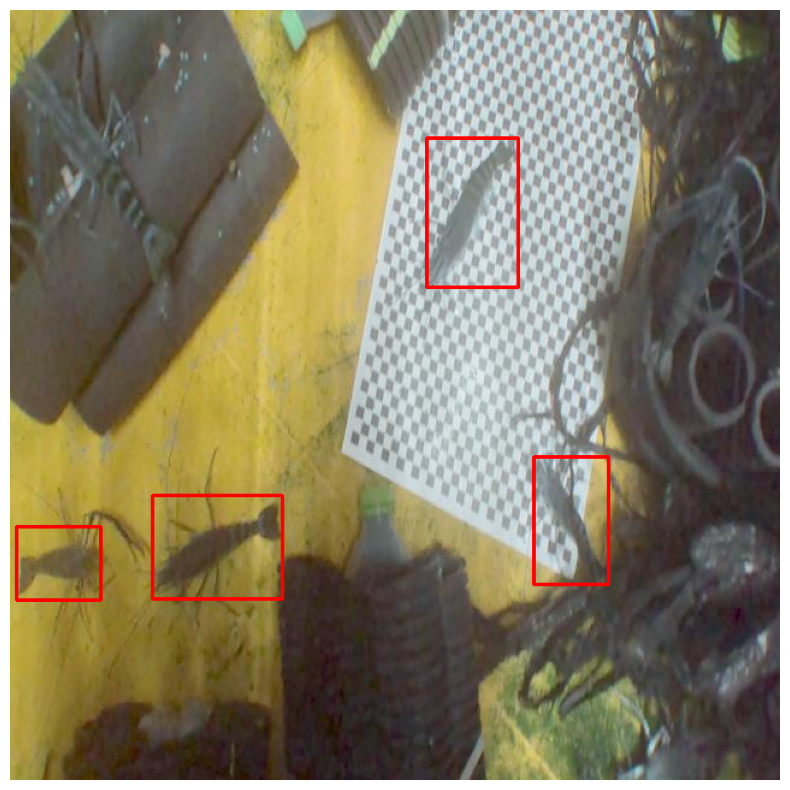

In [18]:
import cv2
import numpy as np

import matplotlib.pyplot as plt


bobo=[]

for box in boxes:
    x_min, y_min, x_max, y_max = box
    # Draw the bounding box
    cv2.rectangle(image, (x_min, y_min), (x_max, y_max), color=(255, 0, 0), thickness=2)

# Display the image with bounding boxes
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()

In [20]:
import numpy as np


from ultralytics import SAM

# Load a model
model = SAM(r'C:\Users\gbo10\Videos\research\counting_research_algorithms\fifty_one\measurements\sam2_b.pt')

# Display model information (optional)

# Segment with bounding box prompt
results = model(image,imgsz=640,save_txt=True,save=True, bboxes=np.array(boxes))


0: 1024x1024 9202.3ms
Speed: 195.1ms preprocess, 9202.3ms inference, 10.5ms postprocess per image at shape (1, 3, 1024, 1024)
Results saved to c:\Users\gbo10\Videos\data-science\Research-counting-algorithms\runs\segment\predict42
0 label saved to c:\Users\gbo10\Videos\data-science\Research-counting-algorithms\runs\segment\predict42\labels


In [11]:
results[0].masks[0].xy

[array([[        346,         105],
        [        345,         106],
        [        345,         198],
        [        346,         199],
        [        346,         211],
        [        345,         212],
        [        345,         228],
        [        347,         230],
        [        372,         230],
        [        373,         231],
        [        377,         231],
        [        378,         230],
        [        392,         230],
        [        393,         231],
        [        397,         231],
        [        398,         230],
        [        410,         230],
        [        411,         231],
        [        421,         231],
        [        423,         229],
        [        423,         132],
        [        422,         131],
        [        422,         119],
        [        423,         118],
        [        423,         111],
        [        422,         110],
        [        422,         107],
        [        421,       

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from math import sqrt
from random import randint, shuffle

# Defining infinity
INF = 1e18

# Structure to represent a 2D point
class Point:
    def __init__(self, X=0, Y=0) -> None:
        self.X = X
        self.Y = Y

# Structure to represent a 2D circle
class Circle:
    def __init__(self, c=Point(), r=0) -> None:    
        self.C = c
        self.R = r

# Function to return the euclidean distance between two points
def dist(a, b):
    return sqrt((a.X - b.X) ** 2 + (a.Y - b.Y) ** 2)

# Function to check whether a point lies inside or on the boundaries of the circle
def is_inside(c, p):
    return dist(c.C, p) <= c.R

# Helper method to get a circle defined by 3 points
def get_circle_center(bx, by, cx, cy):
    B = bx * bx + by * by
    C = cx * cx + cy * cy
    D = bx * cy - by * cx
    return Point((cy * B - by * C) / (2 * D), (bx * C - cx * B) / (2 * D))

# Function to return the smallest circle that intersects 2 points
def circle_from1(A, B):
    C = Point((A.X + B.X) / 2.0, (A.Y + B.Y) / 2.0)
    return Circle(C, dist(A, B) / 2.0)

# Function to return a unique circle that intersects three points
def circle_from2(A, B, C):
    I = get_circle_center(B.X - A.X, B.Y - A.Y, C.X - A.X, C.Y - A.Y)
    I.X += A.X
    I.Y += A.Y
    return Circle(I, dist(I, A))

# Function to check whether a circle encloses the given points
def is_valid_circle(c, P):
    for p in P:
        if not is_inside(c, p):
            return False
    return True

# Function to return the minimum enclosing circle for N <= 3
def min_circle_trivial(P):
    assert len(P) <= 3
    if not P:
        return Circle()
    elif len(P) == 1:
        return Circle(P[0], 0)
    elif len(P) == 2:
        return circle_from1(P[0], P[1])
    for i in range(3):
        for j in range(i + 1, 3):
            c = circle_from1(P[i], P[j])
            if is_valid_circle(c, P):
                return c
    return circle_from2(P[0], P[1], P[2])

# Returns the MEC using Welzl's algorithm
def welzl_helper(P, R, n):
    if n == 0 or len(R) == 3:
        return min_circle_trivial(R)
    idx = randint(0, n - 1)
    p = P[idx]
    P[idx], P[n - 1] = P[n - 1], P[idx]
    d = welzl_helper(P, R.copy(), n - 1)
    if is_inside(d, p):
        return d
    R.append(p)
    return welzl_helper(P, R.copy(), n - 1)

def welzl(P):
    P_copy = P.copy()
    shuffle(P_copy)
    return welzl_helper(P_copy, [], len(P_copy))

# Assuming you have multiple masks as a list of 3D numpy arrays (3, height, width)
def get_main_body_mask(mask):
    # Combine all three channels into one mask
    combined_mask = np.any(mask, axis=0).astype(np.uint8) * 255
    return combined_mask

# Function to filter out the claw based on heuristic
def filter_out_claw(contours):
    # Assuming the largest contour is the body without the claw
    main_body_contour = max(contours, key=cv2.contourArea)
    return main_body_contour

# Load the masks
# Replace with your mask generation logic

image_new=image.copy()
# Create a coy of the original image to draw masks on
# Process each mask individually
for xy in results[0].masks.xy:
    # Convert the list of (x, y) coordinates to a list of Point objects
    points = [Point(p[0], p[1]) for p in xy]

    # Apply Welzl's algorithm to find the minimum enclosing circle
    mec = welzl(points)

    # Draw the circle on the original image
    center = (int(mec.C.X), int(mec.C.Y))
    radius = int(mec.R)
    cv2.circle(image_new, center, radius, (0, 255, 0), 2)

    print(f"Circle center: {center}, Radius: {radius}")

    
#show circles

plt.figure(figsize=(10, 10))
plt.imshow(image_new)
plt.axis('off')
plt.show()

# Display the image with the minimum enclosing circle   


NameError: name 'image' is not defined

In [33]:
normalize_points=[]

for xy in results[0].masks.xy:
    # Convert the list of (x, y) coordinates to a list of Point objects
    normalize_points = [Point(p[0]/640*5312, p[1]/640*2988) for p in xy]

    # Apply Welzl's algorithm to find the minimum enclosing circle
    mec = welzl(normalize_points)

    center = (int(mec.C.X), int(mec.C.Y))
    radius = int(mec.R)
    cv2.circle(image_new, center, radius, (0, 255, 0), 2)

    print(f"Circle center: {center}, Radius: {radius}")

Circle center: (2463, 852), Radius: 421
Circle center: (2905, 2105), Radius: 480


In [21]:
#save image
cv2.imwrite("C:/Users/gbo10/OneDrive/measurement_paper_images/fff.png", image)

True

In [36]:
image_new.shape

(640, 640, 3)

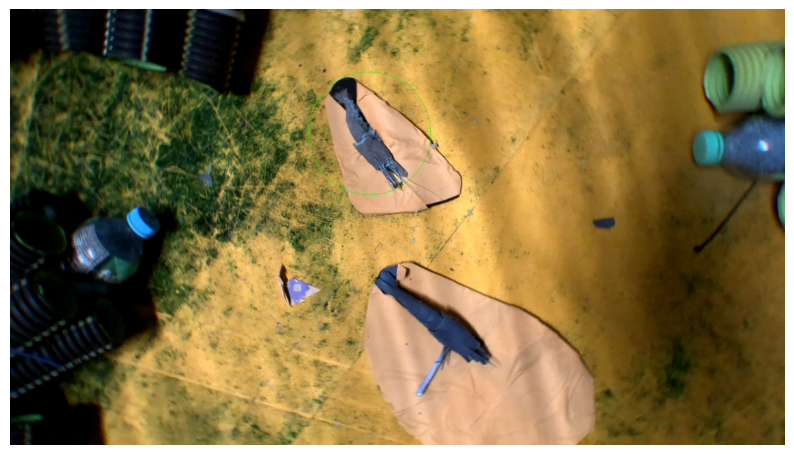

In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 

# Draw the circle on the original image
# im=cv2.imread(r"C:\Users\gbo10\OneDrive\measurement_paper_images\molt\car\vlcsnap-2024-08-21-10h00m11s774.png",)
# im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

image=cv2.imread(r"C:\Users\gbo10\OneDrive\measurement_paper_images\molt\molt_right\vlcsnap-2024-08-21-10h04m02s182.png")

cv2.circle(image, (2463, 852), 421, (0, 255, 0), 2)

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()

In [8]:
555*2

1110

In [9]:
image

array([[[ 0, 10,  3],
        [ 0,  8,  1],
        [ 0,  8,  1],
        ...,
        [ 0, 57, 54],
        [ 0, 59, 56],
        [ 0, 59, 56]],

       [[ 0,  9,  2],
        [ 0,  8,  1],
        [ 0,  9,  2],
        ...,
        [ 0, 59, 56],
        [ 0, 59, 56],
        [ 0, 59, 56]],

       [[ 0,  8,  2],
        [ 0,  9,  2],
        [ 0,  8,  1],
        ...,
        [ 0, 58, 55],
        [ 0, 58, 55],
        [ 0, 60, 57]],

       ...,

       [[ 3,  4,  0],
        [ 4,  4,  0],
        [ 5,  5,  0],
        ...,
        [ 0, 61, 64],
        [ 0, 58, 62],
        [ 0, 58, 61]],

       [[ 4,  6,  0],
        [ 5,  6,  0],
        [ 6,  7,  0],
        ...,
        [ 0, 59, 61],
        [ 0, 57, 61],
        [ 0, 56, 62]],

       [[ 0,  5,  0],
        [ 1,  5,  0],
        [ 1,  6,  1],
        ...,
        [ 1, 56, 64],
        [ 0, 62, 61],
        [ 0, 57, 59]]], dtype=uint8)

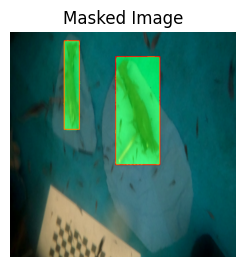

In [19]:
from mobile_sam import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

model_type = "vit_t"
sam_checkpoint = r"C:\Users\gbo10\OneDrive\measurement_paper_images\molt\car\mobile_sam.pt"


mobile_sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)

mobile_sam.eval()

predictor = SamPredictor(mobile_sam)
predictor.set_image(image)
masks=[]

for input_box in boxes:
    mask, _, _ = predictor.predict(
       
        box=input_box[None, :  ],
        
    )
    masks.append(mask)

for mask in masks:
    # Combine all three channels into one mask
    single_mask = np.any(mask, axis=0).astype(np.uint8) * 255
    # Create a colored mask for visualization
    color_mask = np.zeros_like(image)
    color_mask[single_mask == 255] = [0, 255, 0]  # Green color
    # Combine the colored mask with the image
    image = cv2.addWeighted(image, 1, color_mask, 0.5, 0)
#show the masks on the same image


# Display the original and masked images

plt.subplot(1, 2, 2)
plt.title('Masked Image')
plt.imshow(image)
plt.axis('off')

plt.show()

In [10]:
boxes

[array([2483,  337, 3523, 1766]), array([1272,  126, 1630, 1299])]

In [11]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: None
 keypoints: None
 masks: ultralytics.engine.results.Masks object
 names: {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7'}
 obb: None
 orig_img: array([[[124, 135, 132],
         [123, 134, 131],
         [123, 132, 129],
         ...,
         [155, 124,  61],
         [153, 121,  56],
         [150, 118,  53]],
 
        [[120, 129, 126],
         [120, 130, 124],
         [121, 128, 125],
         ...,
         [156, 125,  62],
         [155, 122,  59],
         [152, 120,  55]],
 
        [[114, 121, 116],
         [115, 123, 116],
         [116, 122, 117],
         ...,
         [160, 129,  66],
         [160, 127,  64],
         [158, 125,  62]],
 
        ...,
 
        [[ 67,  60,  40],
         [ 67,  60,  40],
         [ 67,  59,  42],
         ...,
         [ 45,   6,  28],
         [ 46,   7,  29],
         [ 47,   8,  30]],
 
        [[ 68,  61,  41],
         [ 68,  61,  41],
       

In [12]:
#resize imge to 640x640
from PIL import Image
import cv2

image=cv2.imread(r"C:\Users\gbo10\OneDrive\measurement_paper_images\test images\gamma\GX010080_238_3392.jpg_gamma.jpg")

image = cv2.resize(image, (640, 640), interpolation = cv2.INTER_AREA)

cv2.imwrite(r"GX010080_238_3392.jpg_gamma.jpg", image)



True

In [14]:
model = SAM("mobile_sam.pt")

100%|██████████| 38.8M/38.8M [00:10<00:00, 3.96MB/s]


In [15]:
boxes_ndarray = boxes

# Run inference
results = model(image, bboxes=boxes, save=True)


0: 1024x1024 1580.5ms
Speed: 45.4ms preprocess, 1580.5ms inference, 14.6ms postprocess per image at shape (1, 3, 1024, 1024)
Results saved to c:\Users\gbo10\Videos\data-science\Research-counting-algorithms\runs\segment\predict3


: 

In [22]:
boxes_ndarray.reshape(1, *boxes_ndarray.shape)


array([[[136, 311, 215, 391],
        [456, 143, 517, 286],
        [335, 331, 430, 471],
        [336,   0, 393, 100],
        [135, 156, 211, 323],
        [417, 440, 539, 547],
        [252, 147, 353, 257],
        [ 41,  45, 150, 151]]])

In [24]:
boxes_ndarray.shape

(8, 4)

In [27]:
original_array = np.array([
    [136, 311, 215, 391],
    [456, 143, 517, 286],
    [335, 331, 430, 471],
    [336, 0, 393, 100],
    [135, 156, 211, 323],
    [417, 440, 539, 547],
    [252, 147, 353, 257],
    [41, 45, 150, 151]
])

In [31]:
from ..sam.predict import Predictor


ImportError: attempted relative import with no known parent package

In [30]:
results = model(source=image, bboxes=original_array,save=True,        multimask_output=True,
)

SyntaxError: '[31m[1mmultimask_output[0m' is not a valid YOLO argument. 

    Arguments received: ['yolo', '--f=c:\\Users\\gbo10\\AppData\\Roaming\\jupyter\\runtime\\kernel-v2-18620nXRMx8V2DaK6.json']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of {'detect', 'obb', 'segment', 'pose', 'classify'}
                MODE (required) is one of {'benchmark', 'track', 'val', 'train', 'export', 'predict'}
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at https://docs.ultralytics.com/usage/cfg or with 'yolo cfg'

    1. Train a detection model for 10 epochs with an initial learning_rate of 0.01
        yolo train data=coco8.yaml model=yolov8n.pt epochs=10 lr0=0.01

    2. Predict a YouTube video using a pretrained segmentation model at image size 320:
        yolo predict model=yolov8n-seg.pt source='https://youtu.be/LNwODJXcvt4' imgsz=320

    3. Val a pretrained detection model at batch-size 1 and image size 640:
        yolo val model=yolov8n.pt data=coco8.yaml batch=1 imgsz=640

    4. Export a YOLOv8n classification model to ONNX format at image size 224 by 128 (no TASK required)
        yolo export model=yolov8n-cls.pt format=onnx imgsz=224,128

    5. Explore your datasets using semantic search and SQL with a simple GUI powered by Ultralytics Explorer API
        yolo explorer data=data.yaml model=yolov8n.pt
    
    6. Streamlit real-time object detection on your webcam with Ultralytics YOLOv8
        yolo streamlit-predict
        
    7. Run special commands:
        yolo help
        yolo checks
        yolo version
        yolo settings
        yolo copy-cfg
        yolo cfg

    Docs: https://docs.ultralytics.com
    Community: https://community.ultralytics.com
    GitHub: https://github.com/ultralytics/ultralytics
     (<string>)

In [87]:
import cv2

image = cv2.imread('C:/Users/gbo10/OneDrive/measurement_paper_images/to colab/test with seperation/images/right round/GX010080_238_3392-jpg_gamma_jpg.rf.d7478d09dc9575d906be2aa0096bd429.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)



In [2]:

predictor.set_image(image)

masks=[]

for input_box in boxes:
    mask, _, _ = predictor.predict(
       
        box=input_box[None, :  ],
        
    )
    masks.append(mask)

for mask in masks:
    # Combine all three channels into one mask
    single_mask = np.any(mask, axis=0).astype(np.uint8) * 255
    # Create a colored mask for visualization
    color_mask = np.zeros_like(image)
    color_mask[single_mask == 255] = [0, 255, 0]  # Green color
    # Combine the colored mask with the image
    image = cv2.addWeighted(image, 1, color_mask, 0.5, 0)
#show the masks on the same image


# Display the original and masked images

plt.subplot(1, 2, 2)
plt.title('Masked Image')
plt.imshow(image)
plt.axis('off')

plt.show()

NameError: name 'predictor' is not defined

In [ ]:
import cv2

image = cv2.imread('C:/Users/gbo10/OneDrive/measurement_paper_images/to colab/test with seperation/images/right round/GX010080_238_3392-jpg_gamma_jpg.rf.d7478d09dc9575d906be2aa0096bd429.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

predictor.set_image(image)

16


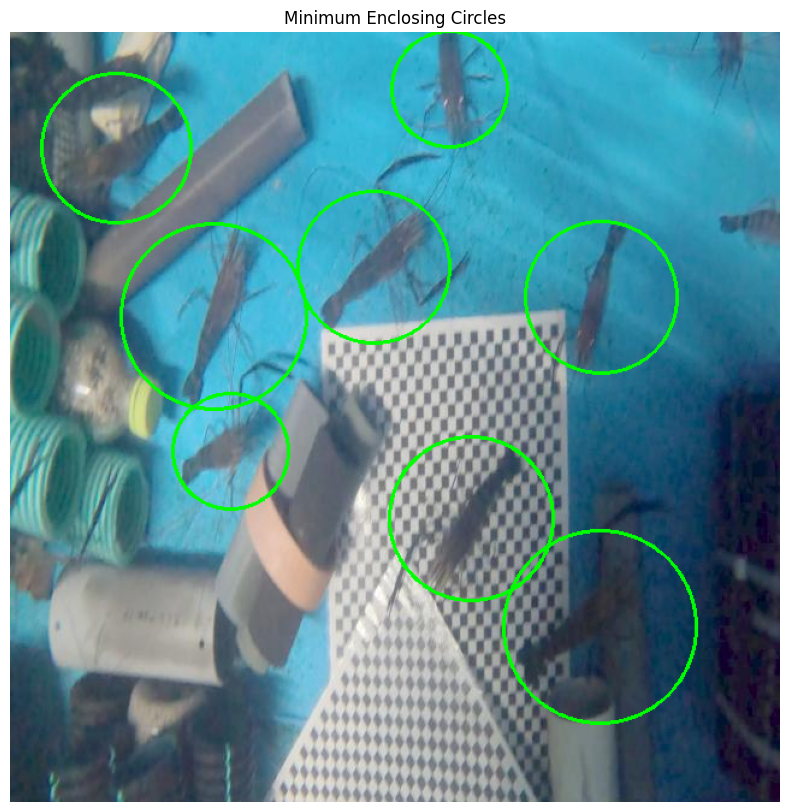

In [88]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from math import sqrt
from random import randint, shuffle

# Defining infinity
INF = 1e18

# Structure to represent a 2D point
class Point:
    def __init__(self, X=0, Y=0) -> None:
        self.X = X
        self.Y = Y

# Structure to represent a 2D circle
class Circle:
    def __init__(self, c=Point(), r=0) -> None:    
        self.C = c
        self.R = r

# Function to return the euclidean distance between two points
def dist(a, b):
    return sqrt((a.X - b.X) ** 2 + (a.Y - b.Y) ** 2)

# Function to check whether a point lies inside or on the boundaries of the circle
def is_inside(c, p):
    return dist(c.C, p) <= c.R

# Helper method to get a circle defined by 3 points
def get_circle_center(bx, by, cx, cy):
    B = bx * bx + by * by
    C = cx * cx + cy * cy
    D = bx * cy - by * cx
    return Point((cy * B - by * C) / (2 * D), (bx * C - cx * B) / (2 * D))

# Function to return the smallest circle that intersects 2 points
def circle_from1(A, B):
    C = Point((A.X + B.X) / 2.0, (A.Y + B.Y) / 2.0)
    return Circle(C, dist(A, B) / 2.0)

# Function to return a unique circle that intersects three points
def circle_from2(A, B, C):
    I = get_circle_center(B.X - A.X, B.Y - A.Y, C.X - A.X, C.Y - A.Y)
    I.X += A.X
    I.Y += A.Y
    return Circle(I, dist(I, A))

# Function to check whether a circle encloses the given points
def is_valid_circle(c, P):
    for p in P:
        if not is_inside(c, p):
            return False
    return True

# Function to return the minimum enclosing circle for N <= 3
def min_circle_trivial(P):
    assert len(P) <= 3
    if not P:
        return Circle()
    elif len(P) == 1:
        return Circle(P[0], 0)
    elif len(P) == 2:
        return circle_from1(P[0], P[1])
    for i in range(3):
        for j in range(i + 1, 3):
            c = circle_from1(P[i], P[j])
            if is_valid_circle(c, P):
                return c
    return circle_from2(P[0], P[1], P[2])

# Returns the MEC using Welzl's algorithm
def welzl_helper(P, R, n):
    if n == 0 or len(R) == 3:
        return min_circle_trivial(R)
    idx = randint(0, n - 1)
    p = P[idx]
    P[idx], P[n - 1] = P[n - 1], P[idx]
    d = welzl_helper(P, R.copy(), n - 1)
    if is_inside(d, p):
        return d
    R.append(p)
    return welzl_helper(P, R.copy(), n - 1)

def welzl(P):
    P_copy = P.copy()
    shuffle(P_copy)
    return welzl_helper(P_copy, [], len(P_copy))

# Assuming you have multiple masks as a list of 3D numpy arrays (3, height, width)
def get_main_body_mask(mask):
    # Combine all three channels into one mask
    combined_mask = np.any(mask, axis=0).astype(np.uint8) * 255
    return combined_mask

# Function to filter out the claw based on heuristic
def filter_out_claw(contours):
    # Assuming the largest contour is the body without the claw
    main_body_contour = max(contours, key=cv2.contourArea)
    return main_body_contour

# Load the masks
# Replace with your mask generation logic
for input_box in boxes:
    mask, _, _ = predictor.predict(
       
        box=input_box[None, :  ],
        
    )
    masks.append(mask)


# Create a copy of the original image to draw masks on
print(len(masks))
# Process each mask individually
for mask in masks:
    # Get the main body mask
    main_body_mask = get_main_body_mask(mask)

    # Find contours in the main body mask
    contours, _ = cv2.findContours(main_body_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter out the claw
    main_body_contour = filter_out_claw(contours)

    # Convert contour points to list of Point objects
    points = [Point(p[0][0], p[0][1]) for p in main_body_contour]

    # Apply Welzl's algorithm to find the minimum enclosing circle
    mec = welzl(points)

    # Draw the circle on the original image
    center = (int(mec.C.X), int(mec.C.Y))
    radius = int(mec.R)
    cv2.circle(image, center, radius, (0, 255, 0), 2)

# Display the result
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.title('Minimum Enclosing Circles')
plt.axis('off')
plt.show()


4
1
1
1
1
1
1
1
6
1


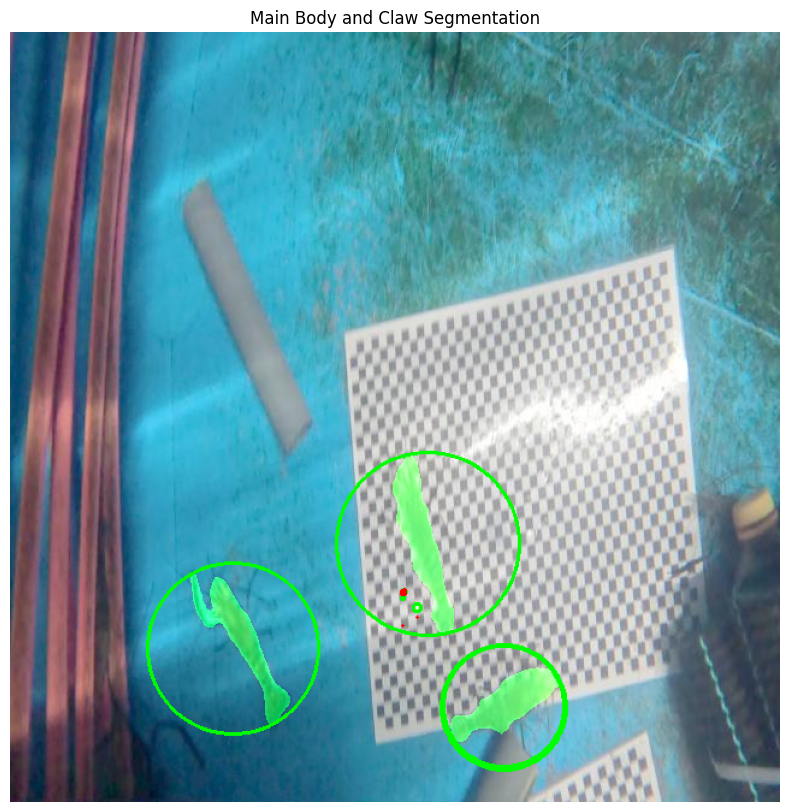

In [56]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from math import sqrt, pi
from random import randint, shuffle

# Defining infinity
INF = 1e18

# Structure to represent a 2D point
class Point:
    def __init__(self, X=0, Y=0) -> None:
        self.X = X
        self.Y = Y

# Structure to represent a 2D circle
class Circle:
    def __init__(self, c=Point(), r=0) -> None:    
        self.C = c
        self.R = r

# Function to return the euclidean distance between two points
def dist(a, b):
    return sqrt((a.X - b.X) ** 2 + (a.Y - b.Y) ** 2)

# Function to check whether a point lies inside or on the boundaries of the circle
def is_inside(c, p):
    return dist(c.C, p) <= c.R

# Helper method to get a circle defined by 3 points
def get_circle_center(bx, by, cx, cy):
    B = bx * bx + by * by
    C = cx * cx + cy * cy
    D = bx * cy - by * cx
    return Point((cy * B - by * C) / (2 * D), (bx * C - cx * B) / (2 * D))

# Function to return the smallest circle that intersects 2 points
def circle_from1(A, B):
    C = Point((A.X + B.X) / 2.0, (A.Y + B.Y) / 2.0)
    return Circle(C, dist(A, B) / 2.0)

# Function to return a unique circle that intersects three points
def circle_from2(A, B, C):
    I = get_circle_center(B.X - A.X, B.Y - A.Y, C.X - A.X, C.Y - A.Y)
    I.X += A.X
    I.Y += A.Y
    return Circle(I, dist(I, A))

# Function to check whether a circle encloses the given points
def is_valid_circle(c, P):
    for p in P:
        if not is_inside(c, p):
            return False
    return True

# Function to return the minimum enclosing circle for N <= 3
def min_circle_trivial(P):
    assert len(P) <= 3
    if not P:
        return Circle()
    elif len(P) == 1:
        return Circle(P[0], 0)
    elif len(P) == 2:
        return circle_from1(P[0], P[1])
    for i in range(3):
        for j in range(i + 1, 3):
            c = circle_from1(P[i], P[j])
            if is_valid_circle(c, P):
                return c
    return circle_from2(P[0], P[1], P[2])

# Returns the MEC using Welzl's algorithm
def welzl_helper(P, R, n):
    if n == 0 or len(R) == 3:
        return min_circle_trivial(R)
    idx = randint(0, n - 1)
    p = P[idx]
    P[idx], P[n - 1] = P[n - 1], P[idx]
    d = welzl_helper(P, R.copy(), n - 1)
    if is_inside(d, p):
        return d
    R.append(p)
    return welzl_helper(P, R.copy(), n - 1)

def welzl(P):
    P_copy = P.copy()
    shuffle(P_copy)
    return welzl_helper(P_copy, [], len(P_copy))

# Function to extract main body excluding the claw
def extract_main_body_and_claw(mask):
    # Find contours in the mask
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    print(len(contours))   

    if len(contours) == 0:
        return None, None

    # Assuming the largest contour is the body including the claw
    largest_contour = max(contours, key=cv2.contourArea)
    
    # Calculate the area of the largest contour
    largest_area = cv2.contourArea(largest_contour)
    
    # Separate contours into potential main body and claw
    main_body_contour = None
    claw_contour = None
    
    for cnt in contours:
        if cv2.contourArea(cnt) > largest_area * 0.1:  # Assuming claw is significantly smaller
            main_body_contour = cnt
        else:
            claw_contour = cnt
    
    return main_body_contour, claw_contour

# Function to get the main body mask from the 3D mask
def get_main_body_mask(mask):
    return np.any(mask, axis=0).astype(np.uint8) * 255

# Load the image and the corresponding masks
masks=masks
print(len(masks))
# Process each mask individually
for mask in masks:
    
    single_channel_mask = get_main_body_mask(mask)
    
    # Apply thresholding to isolate the main body
    _, thresh_mask = cv2.threshold(single_channel_mask, 127, 255, cv2.THRESH_BINARY)
    
    # Find contours in the thresholded mask
    contours, _ = cv2.findContours(thresh_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if len(contours) == 0:
        continue
    for cnt in contours:
       
        x, y, w, h = cv2.boundingRect(cnt)
        cropped_mask = thresh_mask[y:y+h, x:x+w]
        
        main_body_contour, claw_contour = extract_main_body_and_claw(cropped_mask)

        if main_body_contour is not None:
            # Convert contour points to list of Point objects
            points = [Point(p[0][0], p[0][1]) for p in main_body_contour]
            
            # Apply Welzl's algorithm to find the minimum enclosing circle
            mec = welzl(points)
            
            # Adjust the circle position according to the original image
            center = (int(mec.C.X) + x, int(mec.C.Y) + y)
            radius = int(mec.R)
            cv2.circle(image, center, radius, (0, 255, 0), 2)
        
        if claw_contour is not None:
            # Visualize the claw separately
            cv2.drawContours(image, [claw_contour + np.array([[x, y]])], -1, (255, 0, 0), 2)

# Display the result
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.title('Main Body and Claw Segmentation')
plt.axis('off')
plt.show()
